In [1]:
# import packages
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# colormap stuff for plot generation
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [2]:
# define isochrone parameters
AKs = 0
dist = 4500
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F162M', 'jwst,F182M', 'jwst,F200W', 'jwst,F356W', 'jwst,F405N', 'jwst,F115W']
filters = ['m_jwst_F162M', 'm_jwst_F182M', 'm_jwst_F200W', 'm_jwst_F356W', 'm_jwst_F405N', 'm_jwst_F115W']
iso_dir = 'isochrones/'
metallicity = 0

In [3]:
# define log age array for isochrone grid
level_ages = np.linspace(1, 10, 19)
level_ages = np.multiply(level_ages, 1e6)
print(level_ages)
log_age_arr = np.log10(level_ages)
print(log_age_arr)

[ 1000000.  1500000.  2000000.  2500000.  3000000.  3500000.  4000000.
  4500000.  5000000.  5500000.  6000000.  6500000.  7000000.  7500000.
  8000000.  8500000.  9000000.  9500000. 10000000.]
[6.         6.17609126 6.30103    6.39794001 6.47712125 6.54406804
 6.60205999 6.65321251 6.69897    6.74036269 6.77815125 6.81291336
 6.84509804 6.87506126 6.90308999 6.92941893 6.95424251 6.97772361
 7.        ]


In [4]:
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Isochrone generation took 1.331606 s.
Making photometry for isochrone: log(t) = 6.00  AKs = 0.00  dist = 4500
     Starting at:  2024-10-07 06:52:07.940293   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F162M = 21.99
Starting filter: jwst,F182M   Elapsed time: 0.71 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F182M = 22.18
Starting filter: jwst,F200W   Elapsed time: 1.40 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F200W = 22.04
Starting filter: jwst,F356W   Elapsed time: 2.09 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F356W = 21.17
Starting filter: jwst,F405N   Elapsed time: 2.82 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jwst_F405N = 20.84
Starting filter: jwst,F115W   Elapsed time: 3.56 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2344 K  m_jw

Starting filter: jwst,F115W   Elapsed time: 3.86 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2011 K  m_jwst_F115W = 24.68
      Time taken: 4.89 seconds
Changing to logg=5.00 for T=  1960 logg=3.95
Isochrone generation took 1.206812 s.
Making photometry for isochrone: log(t) = 6.70  AKs = 0.00  dist = 4500
     Starting at:  2024-10-07 06:52:52.582998   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1960 K  m_jwst_F162M = 23.51
Starting filter: jwst,F182M   Elapsed time: 0.69 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1960 K  m_jwst_F182M = 23.88
Starting filter: jwst,F200W   Elapsed time: 1.38 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1960 K  m_jwst_F200W = 23.64
Starting filter: jwst,F356W   Elapsed time: 2.08 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1960 K  m_jwst_F356W = 22.43
Starting filter: jwst,F405N   Elapsed time: 2.

Starting filter: jwst,F200W   Elapsed time: 1.37 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1677 K  m_jwst_F200W = 24.34
Starting filter: jwst,F356W   Elapsed time: 2.05 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1677 K  m_jwst_F356W = 22.77
Starting filter: jwst,F405N   Elapsed time: 2.75 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1677 K  m_jwst_F405N = 22.38
Starting filter: jwst,F115W   Elapsed time: 3.48 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1677 K  m_jwst_F115W = 26.57
      Time taken: 4.16 seconds
Changing to logg=5.00 for T=  1631 logg=4.04
Isochrone generation took 1.140192 s.
Making photometry for isochrone: log(t) = 6.95  AKs = 0.00  dist = 4500
     Starting at:  2024-10-07 06:53:36.877406   Usually takes ~5 minutes
Starting filter: jwst,F162M   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1631 K  m_jwst_F162M = 25.00
Starting filter: jwst,F182M   Elapsed time: 0.

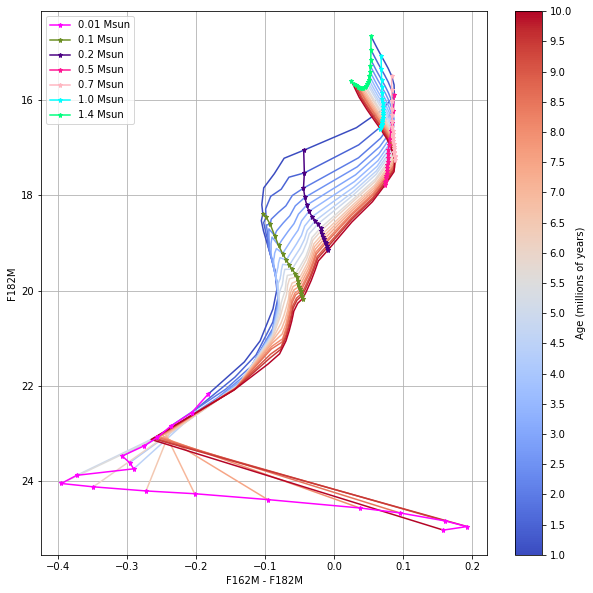

In [5]:
# Plot of estimated points from first trial run for first star
cmap = plt.get_cmap('coolwarm')

py.figure(figsize=(10, 10))

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]]-instances[i].points[filters[1]], 
        instances[i].points[filters[1]], color=color, label='')

py.xlabel('F162M - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])

# Plot mass tracks
masses = [0.01, 0.1, 0.2, 0.5, 0.7, 1.0, 1.4]
colors = ['fuchsia','olivedrab', 'indigo', 'deeppink', 'lightpink', 'cyan', 'springgreen']

for i in range(len(masses)):
    color_magnitude_diff = []
    magnitude_vals = []
    
    for j in range(len(instances)):
        idx = np.where( abs(instances[j].points['mass'] - masses[i] == min(abs(instances[j].points['mass'] - masses[i]))) )[0]
        color_magnitude_diff.append(instances[j].points[filters[0]][idx] - instances[j].points[filters[1]][idx])
        magnitude_vals.append(instances[j].points[filters[1]][idx])
        
    # Convert lists to arrays to avoid issues with dimensions
    color_magnitude_diff = np.array(color_magnitude_diff).flatten()
    magnitude_vals = np.array(magnitude_vals).flatten()
    
    # Plot the mass track by connecting the points
    py.plot(color_magnitude_diff, magnitude_vals, color=colors[i], marker='*', 
            markersize=5, linestyle='-', label=f'{masses[i]} Msun')
    
py.legend()
py.grid()

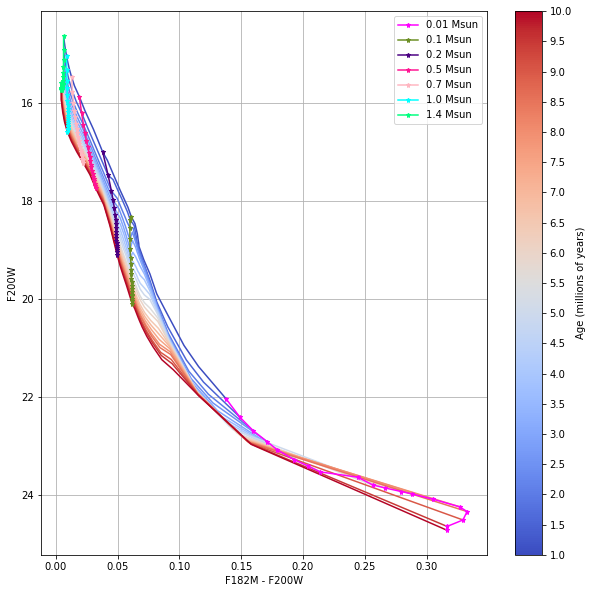

In [6]:
# Plot of estimated points from first trial run for first star
cmap = plt.get_cmap('coolwarm')

py.figure(figsize=(10, 10))

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[1]]-instances[i].points[filters[2]], 
        instances[i].points[filters[2]], color=color, label='')

py.xlabel('F182M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])

# Plot mass tracks
masses = [0.01, 0.1, 0.2, 0.5, 0.7, 1.0, 1.4]
colors = ['fuchsia','olivedrab', 'indigo', 'deeppink', 'lightpink', 'cyan', 'springgreen']

for i in range(len(masses)):
    color_magnitude_diff = []
    magnitude_vals = []
    
    for j in range(len(instances)):
        idx = np.where( abs(instances[j].points['mass'] - masses[i] == min(abs(instances[j].points['mass'] - masses[i]))) )[0]
        color_magnitude_diff.append(instances[j].points[filters[1]][idx] - instances[j].points[filters[2]][idx])
        magnitude_vals.append(instances[j].points[filters[2]][idx])
        
    # Convert lists to arrays to avoid issues with dimensions
    color_magnitude_diff = np.array(color_magnitude_diff).flatten()
    magnitude_vals = np.array(magnitude_vals).flatten()
    
    # Plot the mass track by connecting the points
    py.plot(color_magnitude_diff, magnitude_vals, color=colors[i], marker='*', 
            markersize=5, linestyle='-', label=f'{masses[i]} Msun')
    
py.legend()
py.grid()

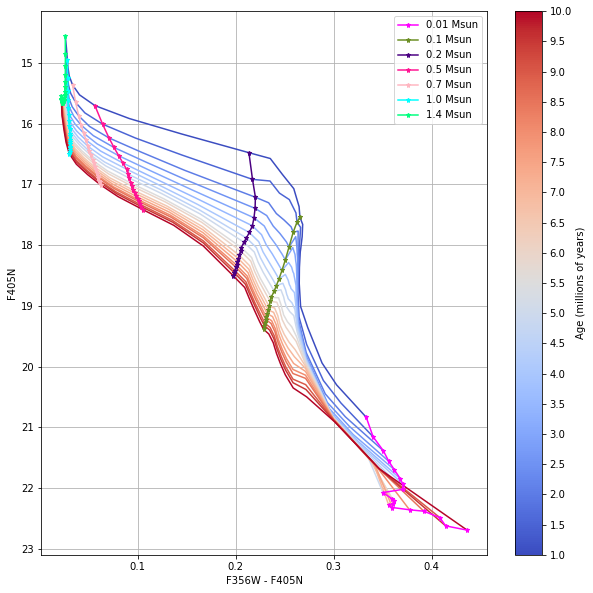

In [7]:
# Plot of estimated points from first trial run for first star
cmap = plt.get_cmap('coolwarm')

py.figure(figsize=(10, 10))

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[3]]-instances[i].points[filters[4]], 
        instances[i].points[filters[4]], color=color, label='')

py.xlabel('F356W - F405N')
py.ylabel('F405N')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])

# Plot mass tracks
masses = [0.01, 0.1, 0.2, 0.5, 0.7, 1.0, 1.4]
colors = ['fuchsia','olivedrab', 'indigo', 'deeppink', 'lightpink', 'cyan', 'springgreen']

for i in range(len(masses)):
    color_magnitude_diff = []
    magnitude_vals = []
    
    for j in range(len(instances)):
        idx = np.where( abs(instances[j].points['mass'] - masses[i] == min(abs(instances[j].points['mass'] - masses[i]))) )[0]
        color_magnitude_diff.append(instances[j].points[filters[3]][idx] - instances[j].points[filters[4]][idx])
        magnitude_vals.append(instances[j].points[filters[4]][idx])
        
    # Convert lists to arrays to avoid issues with dimensions
    color_magnitude_diff = np.array(color_magnitude_diff).flatten()
    magnitude_vals = np.array(magnitude_vals).flatten()
    
    # Plot the mass track by connecting the points
    py.plot(color_magnitude_diff, magnitude_vals, color=colors[i], marker='*', 
            markersize=5, linestyle='-', label=f'{masses[i]} Msun')
    
py.legend()
py.grid()

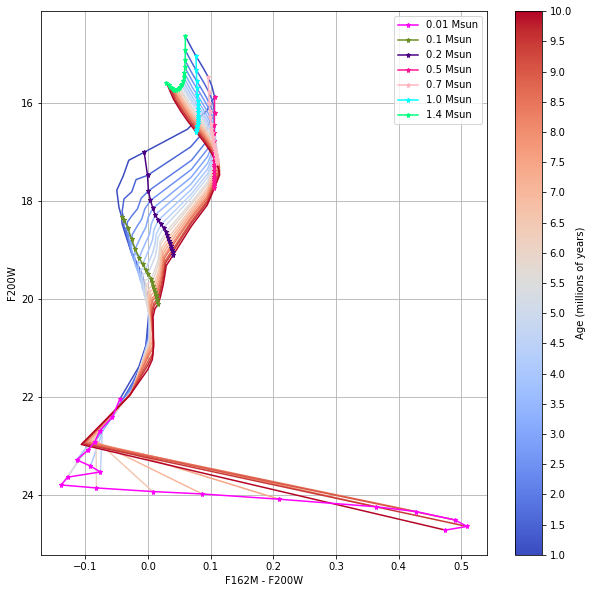

In [8]:
# Plot of estimated points from first trial run for first star
cmap = plt.get_cmap('coolwarm')

py.figure(figsize=(10, 10))

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]]-instances[i].points[filters[2]], 
        instances[i].points[filters[2]], color=color, label='')

py.xlabel('F162M - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])

# Plot mass tracks
masses = [0.01, 0.1, 0.2, 0.5, 0.7, 1.0, 1.4]
colors = ['fuchsia','olivedrab', 'indigo', 'deeppink', 'lightpink', 'cyan', 'springgreen']

for i in range(len(masses)):
    color_magnitude_diff = []
    magnitude_vals = []
    
    for j in range(len(instances)):
        idx = np.where( abs(instances[j].points['mass'] - masses[i] == min(abs(instances[j].points['mass'] - masses[i]))) )[0]
        color_magnitude_diff.append(instances[j].points[filters[0]][idx] - instances[j].points[filters[2]][idx])
        magnitude_vals.append(instances[j].points[filters[2]][idx])
        
    # Convert lists to arrays to avoid issues with dimensions
    color_magnitude_diff = np.array(color_magnitude_diff).flatten()
    magnitude_vals = np.array(magnitude_vals).flatten()
    
    # Plot the mass track by connecting the points
    py.plot(color_magnitude_diff, magnitude_vals, color=colors[i], marker='*', 
            markersize=5, linestyle='-', label=f'{masses[i]} Msun')
    
py.legend()
py.grid()

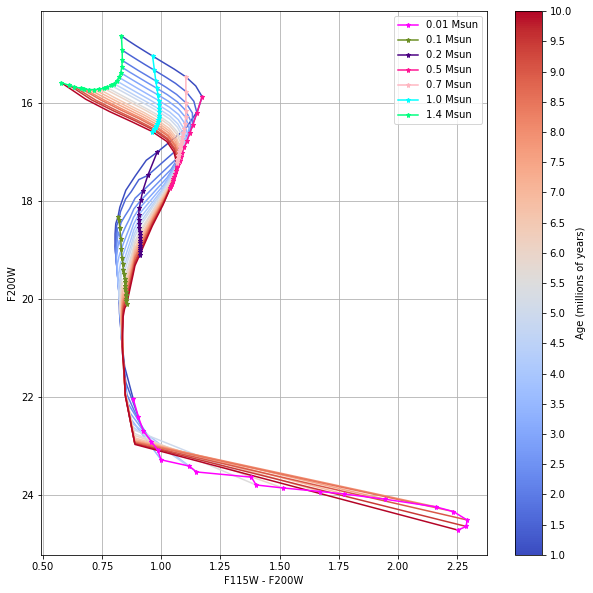

In [10]:
# Plot of estimated points from first trial run for first star
cmap = plt.get_cmap('coolwarm')

py.figure(figsize=(10, 10))

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[5]]-instances[i].points[filters[2]], 
        instances[i].points[filters[2]], color=color, label='')

py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

# Create colorbar legend
norm = Normalize(vmin=min(level_ages), vmax=max(level_ages))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (millions of years)')
cbar.set_ticks(level_ages)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_ages])

# Plot mass tracks
masses = [0.01, 0.1, 0.2, 0.5, 0.7, 1.0, 1.4]
colors = ['fuchsia','olivedrab', 'indigo', 'deeppink', 'lightpink', 'cyan', 'springgreen']

for i in range(len(masses)):
    color_magnitude_diff = []
    magnitude_vals = []
    
    for j in range(len(instances)):
        idx = np.where( abs(instances[j].points['mass'] - masses[i] == min(abs(instances[j].points['mass'] - masses[i]))) )[0]
        color_magnitude_diff.append(instances[j].points[filters[5]][idx] - instances[j].points[filters[2]][idx])
        magnitude_vals.append(instances[j].points[filters[2]][idx])
        
    # Convert lists to arrays to avoid issues with dimensions
    color_magnitude_diff = np.array(color_magnitude_diff).flatten()
    magnitude_vals = np.array(magnitude_vals).flatten()
    
    # Plot the mass track by connecting the points
    py.plot(color_magnitude_diff, magnitude_vals, color=colors[i], marker='*', 
            markersize=5, linestyle='-', label=f'{masses[i]} Msun')
    
py.legend()
py.grid()